In [1]:
import warnings

warnings.filterwarnings('ignore')

# Sentence Embeddings

## Table of Contents
1. [Sentence BERT](#Sentence-BERT)


2. [Evaluating Different Sentence Embedding Models](#Evaluating-Different-Sentence-Embedding-Models)

    i) [Example STS Task](#Example-STS-Task)
    
    ii) [SBERT on STS](#SBERT-on-STS)
    
    iii) [Cross Encoder](#Cross-Encoder)
    
    iv) [Averaging GloVe Embeddings](#Averaging-GloVe-Embeddings)
    
    v) [Averaging BERT Embeddings](#Averaging-BERT-Embeddings)
    
    vi) [BERT CLS Token](#BERT-CLS-Token)
    
    vii) [InferSent GloVe](#InferSent-GloVe)
    
    viii) [Universal Sentence Encoder](#Universal-Sentence-Encoder)
    
    ix) [Sim CSE Encoder](#Sim-CSE-Encoder)
    
    x) [Comparison of Results](#Comparison-of-Results)
    
    
3. [Vector Space Representation](#Vector-Space-Representation)

    i) [Comparison of SBERT and SIM CSE Embeddings](#Comparison-of-SBERT-and-SIM-CSE-Embeddings)
    
    ii) [Representing Closeness of Sentences of Different Documents](#Representing-Closeness-of-Sentences-of-Different-Documents)

## Sentence-BERT

Initalizing the best performing "Sentence-BERT" model from https://www.sbert.net/docs/pretrained_models.html#model-overview.

In [2]:
from sentence_transformers import SentenceTransformer

class SbertEncoder:

    def __init__(self):

        self.model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
       

    def encode_sequence(self, sequence):
        return self.model.encode(sequence).flatten()
    
    
    def encode_sequences(self, sequence):
        return self.model.encode(sequence)


In [3]:
sbert_encoder = SbertEncoder()

In [4]:
sentence_embedding = sbert_encoder.encode_sequence('This sentence should be converted to a fixed-sized embedding.')
print(sentence_embedding)

[-1.46211544e-02  2.35537048e-02 -4.35330831e-02  3.40779088e-02
  1.76481791e-02  9.68190562e-03  9.14799341e-04 -1.11760851e-02
  8.41200002e-04 -2.92831426e-03  8.72751176e-02  6.47654524e-03
 -7.39307655e-03  3.28352265e-02  3.26560289e-02 -7.64723942e-02
  6.95656613e-02  2.09988598e-02 -5.52480593e-02  1.77900458e-03
 -1.83653459e-02 -1.38384709e-02  2.33928561e-02 -2.74506807e-02
 -1.54054137e-02 -3.83622013e-02 -3.86157981e-03 -1.75008941e-02
  8.04730784e-03 -1.96830351e-02  1.61399797e-03 -1.75654031e-02
  2.43874621e-02 -5.42934537e-02  1.66827112e-06  1.57198645e-02
 -2.41513196e-02 -1.98502000e-02 -6.44543208e-03  5.72954416e-02
  7.91151263e-03 -4.91547659e-02 -3.92291620e-02  2.55646482e-02
 -1.10494336e-02 -3.61270420e-02  1.04707181e-02 -1.24588842e-02
  8.91318917e-03  4.32247221e-02 -1.25818988e-02 -6.96792603e-02
  1.80657115e-02 -3.87669653e-02  2.14954074e-02  4.08672616e-02
  2.59566884e-02  2.71549542e-02  4.57428861e-03  6.16942234e-02
 -4.64427844e-02  4.81401

In [5]:
print(type(sentence_embedding))
print(sentence_embedding.size)

<class 'numpy.ndarray'>
768


In [6]:
paragraph_embedding = sbert_encoder.encode_sequence('This paragraph should also be converted to a fixed-sized embedding.\
                                    It consists of multiple sentences.\
                                    But since it has less than 384 characters it can be encoded without a problem.\
                                    The resulting vector will have 768 dimensions.')
word_embedding = sbert_encoder.encode_sequence('Hello')

print(paragraph_embedding.size)
print(word_embedding.size)

768
768


## Evaluating Different Sentence Embedding Models

### Example STS Task

Compute Cosine Similarity to Determine the Distance of Embeddings:



In [7]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(v1, v2):
    return dot(v1, v2)/(norm(v1)*norm(v2))

Here are some example of sentence pairs of varying lexical and semantic similarity:

In [8]:
no_sim_1 = ['A robot jockey is commonly used in camel racing as a replacement for human jockeys.',
            'Each album in the series includes 52 songs on two CDs.']
no_sim_2 = ['He was especially hated by anarchists, who attempted to assassinate him during the first year of his reign.',
            'Kennicott Grove was declared a National Historic Landmark in 1976.']
no_sim_3 = ['Isaac Jacob Schmidt is generally regarded as the "founder" of Mongolian studies as an academic discipline.',
           'The station building has automated ticket machines, TOICA automated turnstiles and is staffed.']

no_sim_pairs = [no_sim_1, no_sim_2, no_sim_3]

sim_1 = ['A man is playing a guitar.',
         'A man plays the guitar.']
sim_2 = ['He later learned that the incident was caused by the Concorde\'s sonic boom.',
         'He later found out the alarming incident had been caused by Concorde\'s powerful sonic boom.']
sim_3 = ['Oil falls in Asian trade.',
         'Oil prices down in Asian trade']

sim_pairs = [sim_1, sim_2, sim_3]

semantic_sim_1 = ['The river flows through a valley.',
                'The stream crosses a dale.']
semantic_sim_2 = ['A male horse snapped at the kitten.',
                 'The baby cat was bitten by a stallion.']
semantic_sim_3 = ['How old are you?',
                  'What is your age?']

semantic_sim_pairs = [semantic_sim_1, semantic_sim_2, semantic_sim_3]


lexical_sim_1 = ['The dog barked to rock music and it matched.',
                 'There was a match on a rock next to the bark.']
lexical_sim_2 = ['She is the head of the school.',
                'She headed to the school of fish.']
lexical_sim_3 = ['The crown was placed on velvet.',
                'The crown of the tree seemed velvet.']

lexical_sim_pairs = [lexical_sim_1, lexical_sim_2, lexical_sim_3]

contradict_1 = ['She was extremely hungry.',
                'She had just eaten a lot']
contradict_2 = ['It\'s dark inside.',
               'There\'s a light inside.']
contradict_3 = ['John never goes to the park.',
               'John is at the park.']

contradict_pairs = [contradict_1, contradict_2, contradict_3]

all_pairs = [no_sim_pairs, sim_pairs, semantic_sim_pairs, lexical_sim_pairs, contradict_pairs]
all_sentences = no_sim_1 + no_sim_2 + no_sim_2 + sim_1 + sim_2 + sim_3 + semantic_sim_1 + semantic_sim_2 + semantic_sim_3 + lexical_sim_1 + lexical_sim_2 + lexical_sim_3 + contradict_1 + contradict_2 + contradict_3 


### SBERT on STS

In [9]:
encoder = sbert_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [10]:
print('Similarity Scores using SBERT-embeddings:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using SBERT-embeddings:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
-0.017755387
-0.044338834
-0.06636029

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.9819446
0.9591739
0.81639355

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.6500966
0.60692346
0.7807379

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.4104446
0.45027977
0.707808

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.7798387
0.6909339
0.5061678


### Cross Encoder

Initalizing best performing Cross-Encoding model trained on STS from https://www.sbert.net/docs/pretrained_cross-encoders.html#.

In [11]:
from sentence_transformers import CrossEncoder

class CEncoder:
    
    def __init__(self):
        
        self.model = CrossEncoder('cross-encoder/stsb-roberta-large')
        
        
    def predict_sim(self, sent_a, sent_b):
        return self.model.predict([(sent_a, sent_b)]).flatten()
    

In [12]:
cross_encoder = CEncoder()

In [13]:
encoder = cross_encoder

In [14]:
print('Similarity Scores using a Cross-Encoder directly:')
print()
print('The first three sentence pairs are not similar. Their predicted similarity thus should be low:')
for pair in all_pairs[0]:
    print(encoder.predict_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. Their predicted similarity thus should be high:')
for pair in all_pairs[1]:
    print(encoder.predict_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. Their predicted similarity thus should be high:')
for pair in all_pairs[2]:
    print(encoder.predict_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. Their predicted similarity thus should be low:')
for pair in all_pairs[3]:
    print(encoder.predict_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren contradictions. Their predicted similarity thus should be low:')
for pair in all_pairs[4]:
    print(encoder.predict_sim(pair[0], pair[1]))


Similarity Scores using a Cross-Encoder directly:

The first three sentence pairs are not similar. Their predicted similarity thus should be low:
[0.00896133]
[0.00925975]
[0.00918953]

The next three sentence pairs are pretty similar. Their predicted similarity thus should be high:
[0.96502155]
[0.8958487]
[0.94217736]

The next three sentence pairs are semantically similar. Their predicted similarity thus should be high:
[0.46667573]
[0.5757052]
[0.93491554]

The next three sentence pairs aren't semantically similar, although they share some words. Their predicted similarity thus should be low:
[0.5328676]
[0.4771233]
[0.69377327]

The next three sentence pairs aren contradictions. Their predicted similarity thus should be low:
[0.36748508]
[0.27398667]
[0.31410536]


### Averaging GloVe Embeddings

Downloaded the largest set of GloVe Embeddings available on https://nlp.stanford.edu/projects/glove/, tokenized the sentences and got the mean of the GloVe Embeddings of their tokens.

In [15]:
import numpy as np

def mean_of_numpy_vectors(list_of_vectors):
    arr = np.array(list_of_vectors)
    return np.mean(arr, axis=0)
    

In [16]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize


glove_filename = 'glove.840B.300d.txt'
word2vec_output_file = 'gensim_glove_vectors.txt'

class GloVeEncoder:
    
    def __init__(self):
        
        self.model = KeyedVectors.load_word2vec_format(glove_filename, binary=False, no_header=True)
        
        
    def encode_sentence(self, sentence):
        words = word_tokenize(sentence)
        word_vectors = []
        for word in words:
            try:
                word_vectors.append(self.model.get_vector(word))
            except:
                pass
        return mean_of_numpy_vectors(word_vectors)
    
    
    def encode_sequences(self, list_of_sequences):
        list_of_encodings = []
        for sequence in list_of_sequences:
            list_of_encodings.append(self.encode_sentence(sequence))
        return list_of_encodings


In [17]:
glove_encoder = GloVeEncoder()

In [18]:
encoder = glove_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [19]:
print('Similarity Scores using averaged GloVe-embeddings:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using averaged GloVe-embeddings:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
0.6451974
0.57187986
0.5987292

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.96086967
0.97336036
0.9234536

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.81979865
0.87161833
0.8720288

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.87405646
0.9329774
0.9083629

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.8534198
0.92819506
0.9167534


### Averaging BERT Embeddings

Initializing the Bert-Base model from https://huggingface.co/bert-base-uncased, inputting the sentences one by one and averaging the output layer.

In [20]:
from transformers import BertModel, BertTokenizer
import torch

class AveragedBERTEncoder:
    
    def __init__(self):
        
        self.tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")       
        self.model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
        self.model.eval()
        
        
    def encode_sentence(self, sentence):
        marked_text = "[CLS] " + sentence + " [SEP]"
        tokenized_text = self.tokenizer.tokenize(marked_text)
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

        segments_ids = [1] * len(tokenized_text)
        
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        
       
        with torch.no_grad():
            outputs =self.model(tokens_tensor, segments_tensors)

        hidden_states = outputs[2]
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
        return sentence_embedding
        
    def encode_sequences(self, list_of_sequences):
        list_of_encodings = []
        for sequence in list_of_sequences:
            list_of_encodings.append(self.encode_sentence(sequence))
        return np.vstack(list_of_encodings)        
        


In [21]:
avg_bert_encoder = AveragedBERTEncoder()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
encoder = avg_bert_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [23]:
print('Similarity Scores using averaged BERT-embeddings:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using averaged BERT-embeddings:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
0.6349531
0.49309564
0.2591908

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.94567645
0.9721413
0.9097142

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.7734387
0.77306086
0.875775

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.6847182
0.669413
0.71520376

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.80940485
0.8607425
0.7967735


## BERT CLS Token 

Initializing the Bert-Base model from https://huggingface.co/bert-base-uncased, inputting the sentences one by one and only considering the output of the CLS-token.

In [24]:
from transformers import BertModel, BertTokenizer
import torch

class BERTCLSEncoder:
    
    def __init__(self):
        
        self.tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")       
        self.model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
        self.model.eval()
        
        
    def encode_sentence(self, sentence):
        marked_text = "[CLS] " + sentence + " [SEP]"
        tokenized_text = self.tokenizer.tokenize(marked_text)
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

        segments_ids = [1] * len(tokenized_text)
        
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])        
       
        with torch.no_grad():
            outputs =self.model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        cls_vec = hidden_states[-2][0][0]
        return cls_vec
    
        
    def encode_sequences(self, list_of_sequences):
        list_of_encodings = []
        for sequence in list_of_sequences:
            list_of_encodings.append(self.encode_sentence(sequence))
        return list_of_encodings        
        


In [25]:
bert_cls_encoder = BERTCLSEncoder()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
encoder = bert_cls_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [27]:
print('Similarity Scores using BERT CLS token:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using BERT CLS token:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
0.7016609
0.6551337
0.52484775

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.92972565
0.9781051
0.84330827

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.82996297
0.7577999
0.9441084

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.77719796
0.6955423
0.8043648

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.8263306
0.921894
0.75626355


### InferSent GloVe

Download the InferSent model from https://github.com/facebookresearch/InferSent, build a vocabulary of word vectors using GloVe and encode the sentences.

In [28]:
import nltk
from encoding_data.infer_sent.models import InferSent

class InferSentEncoder:

    def __init__(self, sentences_for_vocab):
        nltk.download('punkt')
        params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                        'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}
        self.model = InferSent(params_model)
        self.model.load_state_dict(torch.load('encoding_data/infer_sent/infersent1.pkl'))
        self.model.set_w2v_path('encoding_data/glove.840B.300d.txt')
        self.model.build_vocab(sentences_for_vocab, tokenize=True)


    def encode_sequence(self, sequence):
        return self.model.encode([sequence], tokenize=True)[0]
    

    def encode_sequences(self, list_of_sequences):
        return self.model.encode(list_of_sequences, tokenize=True)


In [29]:
infersent_encoder = InferSentEncoder(all_sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alica\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Found 137(/137) words with w2v vectors
Vocab size : 137


In [30]:
encoder = infersent_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [31]:
print('Similarity Scores using InferSent based on GloVE:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using InferSent based on GloVE:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
0.5752738
0.6092173
0.427571

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.9003573
0.9282723
0.8835344

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.66752577
0.71484137
0.6943985

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.65087944
0.67807305
0.7281468

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.6454916
0.70515937
0.7055229


### Universal Sentence Encoder

Intializing the Universal Sentence Encoder Model from https://tfhub.dev/google/universal-sentence-encoder/4.

In [32]:
import tensorflow_hub as hub

class UniversalSentenceEncoder:

    def __init__(self):
        encoder_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
        self.model = encoder_model
        

    def encode_sequence(self, sequence):
        sequence = [sequence]
        return self.model(sequence)[0].numpy()
    

    def encode_sequences(self, list_of_sequences):
        return self.model(list_of_sequences).numpy()

In [33]:
universal_sent_encoder = UniversalSentenceEncoder()

INFO:absl:Using C:\Users\alica\AppData\Local\Temp\tfhub_modules to cache modules.


In [34]:
encoder = universal_sent_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


In [35]:
print('Similarity Scores using Universal Sentence Encoder:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))


Similarity Scores using Universal Sentence Encoder:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
-0.08900986
0.09015296
-0.076294154

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.9252103
0.85877943
0.85536885

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.37689972
0.5616769
0.80158675

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.3711546
0.547923
0.69006914

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.74539644
0.6030066
0.79000604


### Sim CSE Encoder

Initalizing the best performing Sim CSE Model from https://huggingface.co/princeton-nlp/sup-simcse-roberta-large (https://github.com/princeton-nlp/SimCSE).

In [36]:
from simcse import SimCSE

class SimCSEEncoder:

    def __init__(self):

        self.model = SimCSE('princeton-nlp/sup-simcse-roberta-large')
    

    def encode_sequence(self, sequence):
        return self.model.encode(sequence).numpy()
    

    def encode_sequences(self, sequence):
        return self.model.encode(sequence).numpy()

In [37]:
sim_cse_encoder = SimCSEEncoder()

In [38]:
encoder = sim_cse_encoder

all_embeddings = []
for group in all_pairs:
    group_embeddings = []
    for pair in group:
        embeddings = encoder.encode_sequences(pair)
        group_embeddings.append(embeddings)
    all_embeddings.append(group_embeddings)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]


In [39]:
print('Similarity Scores using SimCSE-embeddings:')
print()
print('The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[0]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[1]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:')
for pair in all_embeddings[2]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs aren\'t semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:')
for pair in all_embeddings[3]:
    print(cos_sim(pair[0], pair[1]))
print()
print('The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:')
for pair in all_embeddings[4]:
    print(cos_sim(pair[0], pair[1]))

Similarity Scores using SimCSE-embeddings:

The first three sentence pairs are not similar. The cosine similarity of their embeddings thus should be low:
-0.06317875
0.05711511
0.099561945

The next three sentence pairs are pretty similar. The cosine similarity of their embeddings thus should be high:
0.9950755
0.9750537
0.9293835

The next three sentence pairs are semantically similar. The cosine similarity of their embeddings thus should be high:
0.663085
0.72181326
0.9699499

The next three sentence pairs aren't semantically similar, although they share some words. The cosine similarity of their embeddings thus should be low:
0.27228615
0.25852975
0.6063756

The next three sentence pairs are contradictions. The cosine similarity of their embeddings thus should be low or even close to -1:
0.79057735
0.7045668
0.37220007


### Comparison of Results

<u>Sentences that are not semantically related:</u>

'A robot jockey is commonly used in camel racing as a replacement for human jockeys.',\
'Each album in the series includes 52 songs on two CDs.'
            
'He was especially hated by anarchists, who attempted to assassinate him during the first year of his reign.',\
'Kennicott Grove was declared a National Historic Landmark in 1976.'
            
'Isaac Jacob Schmidt is generally regarded as the "founder" of Mongolian studies as an academic discipline.',\
'The station building has automated ticket machines, TOICA automated turnstiles and is staffed.'
           

<u>Similar Sentences:</u>

'A man is playing a guitar.',\
'A man plays the guitar.'
         
'He later learned that the incident was caused by the Concorde's sonic boom.',\
'He later found out the alarming incident had been caused by Concorde's powerful sonic boom.'
         
'Oil falls in Asian trade.',\
'Oil prices down in Asian trade'


<u>Semantically, but not Lexically Similar Sentences:</u>
         
'The river flows through a valley.',\
'The stream crosses a dale.'
                
'A male horse snapped at the kitten.',\
'The baby cat was bitten by a stallion.'
                 
'How old are you?',\
'What is your age?'


<u>Lexically, but not Semantically Similar Sentences:</u>                  
                  
'The dog barked to rock music and it matched.',\
'There was a match on a rock next to the bark.'
                 
'She is the head of the school.',\
'She headed to the school of fish.'
                
'The crown was placed on velvet.',\
'The crown of the tree seemed velvet.'


<u>Contradicting Sentences:</u>
                
'She was extremely hungry.',\
 'She had just eaten a lot'
                
'It\'s dark inside.',\
'There\'s a light inside.'
               
'John never goes to the park.',\
'John is at the park.'



|                     |SBERT |Cross-Encoder|avg. GloVe-embeddings|avg. BERT-embeddings|BERT CLS|Infersent GloVe|Universal Sentence Encoder|Sim CSE |
|---------------------|------|-------------|---------------------|--------------------|--------|---------------|------------------------------|---|
|No Similarity 1      |-0.018|0.009        |0.645                |0.635               |0.702   |0.575          |-0.089|-0.063|    
|No Similarity 2      |-0.044|0.009        |0.572                |0.493               |0.655   |0.609          |0.090 |0.057|
|No Similarity 3      |-0.066|0.009        |0.599                |0.259               |0.525   |0.428          |-0.076|0.100|
|||||||||
|Strong Similarity 1  |0.982 |0.965        |0.960                |0.946               |0.930   |0.900          |0.925 |0.995|
|Strong Similarity 2  |0.959 |0.896        |0.973                |0.972               |0.978   |0.928          |0.859 |0.975|
|Strong Similarity 3  |0.816 |0.942        |0.923                |0.910               |0.843   |0.884          |0.855 |0.929|
||||||||
|Semantic Similarity 1|0.650 |0.467        |0.820                |0.773               |0.830   |0.668          |0.376 |0.663|
|Semantic Similarity 2|0.606 |0.576        |0.872                |0.773               |0.758   |0.715          |0.562 |0.722|
|Semantic Similarity 3|0.780 |0.935        |0.872                |0.875               |0.944   |0.694          |0.802 |0.970|
||||||||
|Lexical Similarity 1 |0.410 |0.533        |0.874                |0.685               |0.777   |0.651          |0.371 |0.272|
|Lexical Similarity 2 |0.450 |0.477        |0.933                |0.669               |0.696   |0.678          |0.548 |0.258|
|Lexical Similarity 3 |0.708 |0.694        |0.908                |0.715               |0.804   |0.728          |0.690 |0.606|
||||||||
|Contradictions 1     |0.780 |0.367        |0.853                |0.809               |0.826   |0.645          |0.745 |0.791|
|Contradictions 2     |0.691 |0.274        |0.928                |0.861               |0.922   |0.705          |0.603 |0.705|
|Contradictions 3     |0.506 |0.314        |0.917                |0.797               |0.756   |0.706          |0.790 |0.372|



## Vector Space Representation

### Comparison of SBERT and SIM CSE Embeddings 

Here are some examples of sentences representing related topics.

In [40]:
sunny_weather = ['The sun is shining.', 'The sky is blue.', 'There are no clouds.']
rainy_weather = ['It\'s raining.', 'It is wet outside.', 'There are clouds in the sky.']
hot_weather = ['It is hot outside.', 'The air is warm.', 'The temperature is high.']
cold_weather = ['It is cold outside.', 'It\'s freezing.', 'The temeprature is low.']

summer = ['It\'s summer.']
winter = ['It\'s winter.']

italy = ['We\'re in Italy.']
england = ['We\'re in England.']
qatar = ['We\'re in Qatar.']
antarctica = ['We\'re in Antarctica.']

concat_sent = sunny_weather + rainy_weather + hot_weather + cold_weather + summer + winter + italy + england + qatar + antarctica


For comparison embeddings are created using both Sentence-BERT and Sim CSE.

In [41]:
sbert_embeddings = sbert_encoder.encode_sequences(concat_sent)
sim_cse_embeddings = sim_cse_encoder.encode_sequences(concat_sent)
avg_bert_embeddings = avg_bert_encoder.encode_sequences(concat_sent)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.98s/it]


Then the embeddings are reduced to two dimensions using PCA to visually represent them.

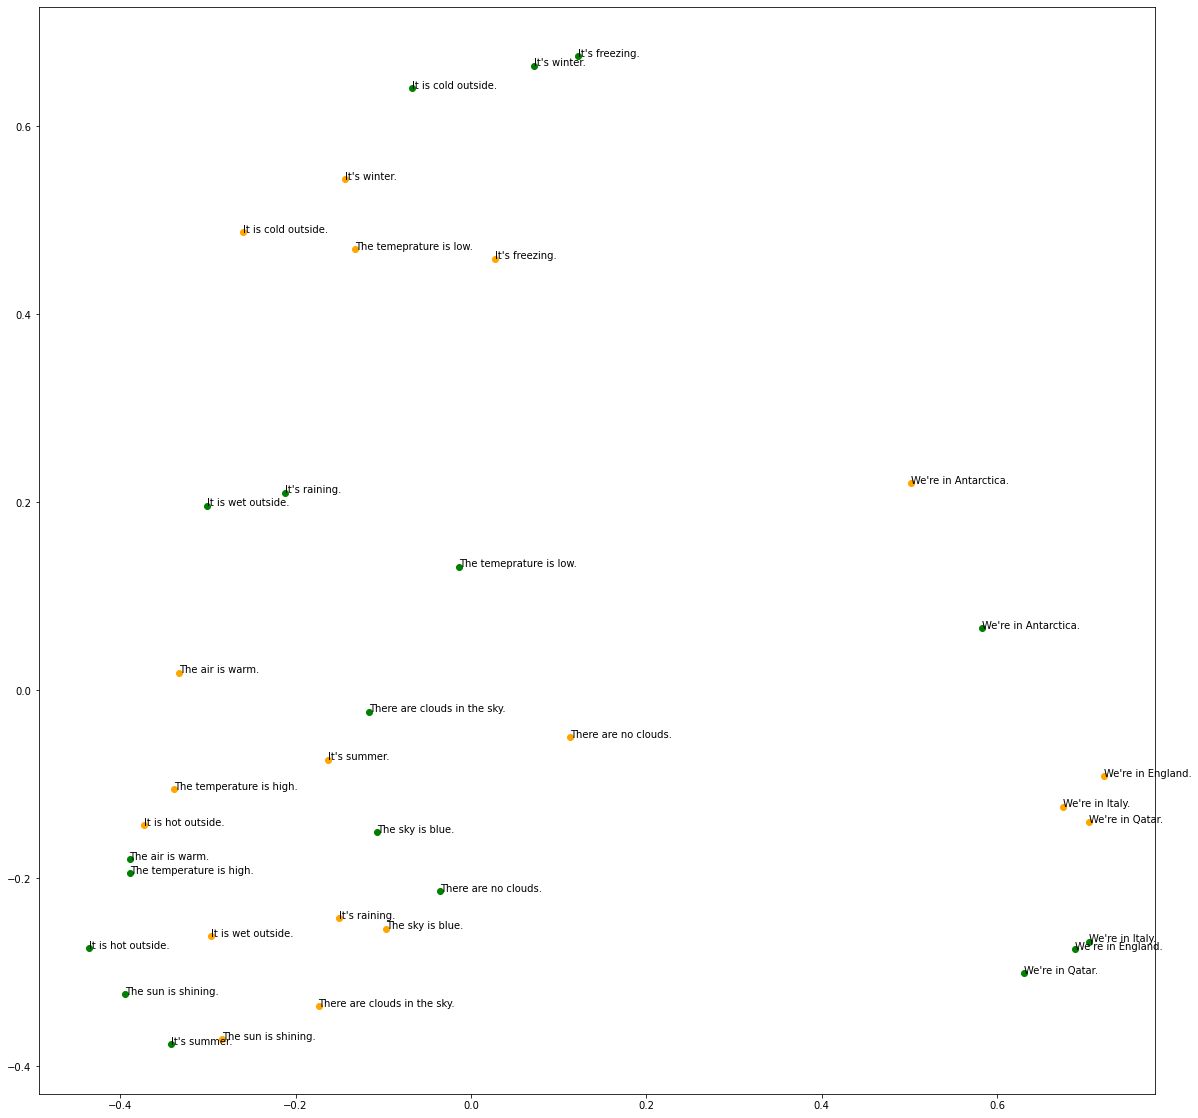

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


sbert_embeddings_reduced = pca.fit_transform(sbert_embeddings)
sbert_embeddings_t = sbert_embeddings_reduced.transpose()

sim_cse_embeddings_reduced = pca.fit_transform(sim_cse_embeddings)
sim_cse_embeddings_t = sim_cse_embeddings_reduced.transpose()

avg_bert_embeddings_reduced = pca.fit_transform(avg_bert_embeddings)
avg_bert_embeddings_t = avg_bert_embeddings_reduced.transpose()

plt.rcParams["figure.figsize"]=20,20

plt.scatter(sbert_embeddings_t[0], sbert_embeddings_t[1], color='orange')
plt.scatter(sim_cse_embeddings_t[0], sim_cse_embeddings_t[1], color = 'green')
# plt.scatter(avg_bert_embeddings_t[0], avg_bert_embeddings_embeddings_t[1], color = 'red')

for i in range(len(sbert_embeddings)):
    point = (sbert_embeddings_t[0][i], sbert_embeddings_t[1][i])
    plt.annotate(concat_sent[i], point)
    
for i in range(len(sim_cse_embeddings)):
    point = (sim_cse_embeddings_t[0][i], sim_cse_embeddings_t[1][i])
    plt.annotate(concat_sent[i], point)
    
# for i in range(len(avg_bert_embeddings)):
#     point = (avg_bert_embeddings_t[0][i], avg_bert_embeddings_t[1][i])
#     plt.annotate(concat_sent[i], point)

# plt.savefig("sbert_sim_cse_avg_bert_vectorspace.png")   
plt.show()

## Representing Closeness of Sentences of Different Documents

In [44]:
doc_1 = 'As she said these words her foot slipped, and in another moment, splash! she was up to her chin in salt water. Her first idea was that she had somehow fallen into the sea, “and in that case I can go back by railway,” she said to herself. (Alice had been to the seaside once in her life, and had come to the general conclusion, that wherever you go to on the English coast you find a number of bathing machines in the sea, some children digging in the sand with wooden spades, then a row of lodging houses, and behind them a railway station.) However, she soon made out that she was in the pool of tears which she had wept when she was nine feet high.'

doc_2 = 'It was on a dreary night of November that I beheld the accomplishment of my toils. With an anxiety that almost amounted to agony, I collected the instruments of life around me, that I might infuse a spark of being into the lifeless thing that lay at my feet. It was already one in the morning; the rain pattered dismally against the panes, and my candle was nearly burnt out, when, by the glimmer of the half-extinguished light, I saw the dull yellow eye of the creature open; it breathed hard, and a convulsive motion agitated its limbs. How can I describe my emotions at this catastrophe, or how delineate the wretch whom with such infinite pains and care I had endeavoured to form? His limbs were in proportion, and I had selected his features as beautiful. Beautiful! Great God! His yellow skin scarcely covered the work of muscles and arteries beneath; his hair was of a lustrous black, and flowing; his teeth of a pearly whiteness; but these luxuriances only formed a more horrid contrast with his watery eyes, that seemed almost of the same colour as the dun-white sockets in which they were set, his shrivelled complexion and straight black lips.'

doc_3 = 'A typewriter ribbon or ink ribbon is an expendable module serving the function of transferring pigment to paper in various devices for impact printing. Such ribbons are part of standard designs for hand- or motor-driven typewriters, teleprinters, stenotype machines, computer-driven printers and many mechanical calculators. The module consists of a length of a medium, either pigment-impregnated woven ribbon or pigment-coated polymer tape, and a transport mechanism involving two axles. At any given moment, most of the length of the medium is wound as a close-spaced spiral around one axle or the other, tight enough for friction among turns to make it behave mostly like a solid cylinder. Rotation of the axles moves the ribbon or tape after each impact and usually aids in maintaining tension along the roughly straight-line path of the medium between the axles. The module may itself include mechanisms that control the tension in the temporarily unwound portion of the medium. Some typewriter ribbons have two different coloured pigments (usually black and red) which could be selected if the typewriter had a switch to allow for words or sentences to be written in a different colour when required.'

doc_4 = 'Silver Arrows (German: Silberpfeil) was the nickname given by the press to Germany\'s dominant Mercedes-Benz and Auto Union Grand Prix motor racing cars between 1934 and 1939. The name was later applied to the Mercedes-Benz Formula One and sports cars in 1954 and 1955, then to the Group C prototype racing sports cars that were successful at the Le Mans in the late 1980\'s, and currently applied to the Mercedes AMG Petronas Formula One Team cars from 2010 to present. For decades until the introduction of sponsorship liveries, each country had its traditional colour in automobile racing. German race cars for their Silver Arrows silver, Italian for their Rosso Corsa red, British ones are British racing green green, French Bleu de France blue, etc. German cars like the Blitzen Benz were white, as were the three Mercedes that won the 1914 French Grand Prix 1–2–3. On the other hand, Mercedes won the Italian Targa Florio with cars painted red in 1922 (Giulio Masetti) and 1924 (Christian Werner), blending in with the local competitors. The big supercharged 200 hp Mercedes-Benz SSKL with which Rudolf Caracciola won the 1931 Mille Miglia was called the White Elephant.'

doc_5 = 'The Orthodox Development view equates economic growth with \'development\'. The gross national product of a country has continually been used by intergovernmental organisations such as the UN, to equate their economical stance to their level of \'development\'. This approach to human progress has been critiqued consistently throughout its history, especially by economists such as Dambisa Moyo, with the main criticisms being that the approach is ethnocentric and one-dimensional. During the 1950s and 1960s as decolonisation progressed, the focus of the World Bank and the UN system generally shifted to the perceived needs of developing countries. There was widespread belief in the developed Western countries, such as the United States and the United Kingdom, among the managers of the major multilateral institutions, such as the European Union, and throughout the UN system, that \'Third World\' states were economically \'backward\' and needed to be \'developed\'. This process would require intervention in their economies. This attitude is now widely opposed by many African economists, such as James Shikwati, who claims aid (and intervention in African states) does more harm than good. "The underlying assumption was that the Western lifestyle and mode of economic organisation were superior and should be universally aspired to." This became known as the Orthodox view of development'

doc_6 = 'You\'ve Still Got A Place In My Heart was released the same year that Jones finally got sober at 52 years old. His wife Nancy told The Texas Monthly in 1994 that the first show Jones played sober in Birmingham, Alabama "was terrible. He was like a scared puppy. \'I can’t do it,\' he said. \'I can’t go on.\' He was begging and breaking down and dying for a drink. And when he got out there on that stage, and after the first song, he looked out to me in the audience, and he seemed like such a poor, lost, wounded soul that I burst into tears." Jones, who had been written off for dead countless times in the previous decade, stated to the Associated Press in June of that year, "All my life it seems like I’ve been running from something. If I knew what it was, maybe I could run in the right direction. But I always seem to end up going the other way." He persevered, however, and the singer managed the longest stretch of sobriety of his adult life, largely thanks to the support of his wife, who had also become his manager. '

doc_7 = 'Torpedo Squadron 8 (VT-8) was a United States Navy squadron of World War II torpedo bombers. VT-8 was assigned initially to the air group of the aircraft carrier USS Hornet, joining the ship shortly after her commissioning in October 1941. After heavy losses in the Battle of Midway, VT-8 was assigned to USS Saratoga. When Saratoga was disabled on 31 August, VT-8 was transferred to Henderson Field on Guadalcanal, operating there until November 1942. Due to heavy cumulative losses on Guadalcanal, VT-8 was then withdrawn and disbanded. A second VT-8 was established in 1943, and served on USS Bunker Hill until the end of the war'

doc_8 = 'On the basis of the physical interpretation of distance which has been indicated, we are also in a position to establish the distance between two points on a rigid body by means of measurements. For this purpose we require a “distance” (rod S) which is to be used once and for all, and which we employ as a standard measure. If, now, A and B are two points on a rigid body, we can construct the line joining them according to the rules of geometry; then, starting from A, we can mark off the distance S time after time until we reach B. The number of these operations required is the numerical measure of the distance AB. This is the basis of all measurement of length.'

doc_9 = 'Some physicians regard with small favor the therapeutic application of plants by the Filipino "herb-doctors" (curanderos) as being entirely empirical. This disparagement is unjustified because in all the most rational and scientific remedies that we make use of, the first step towards the final development of their relative position among remedies is due to empiricism which is founded on daily experience, on observation of results obtained in specific cases, facts thatare handed down from father to son for generations. The scientificexplanation is lacking, but those first ideas frequently owing theirorigin to chance, or, perhaps, to superstition, have often been basedupon the observation of facts which, although fortuitous, are nonethe less positive.Many of the plants mentioned in this book are official in thePharmacopoeia of India and we see no reason why their use should beproscribed in the Philippines. Filipino physicians not only can butshould employ many indigenous plants in their therapeutics; in manyinstances they would find them more useful than the exotics, whichare not always fresh and are commonly reduced in strength by longkeeping or damaged by some circumstance of voyage or climate. Theprice is another argument in favor of the use of native drugs. Ithe pharmacists would prepare extracts and keep on hand the crudedrugs most in demand the public would gain a great advantage and thedruggists be well repaid for their labor. Physicians and pharmacistswill surely understand these advantages and when finally one considersthat the patients generally prefer to be treated with native plants,I feel justified in the hope that their use will spread rapidly inthe Philippines.'

doc_10 = 'And first, I do not see this war as one which has welded Governments andpeoples into complete and sympathetic solidarity as against the commonenemy. I see the people of England united in a fierce detestation anddefiance of the views and acts of Prussian Junkerism. And I see theGerman people stirred to the depths by a similar antipathy to EnglishJunkerism, and anger at the apparent treachery and duplicity of theattack made on them by us in their extremest peril from France andRussia. I see both nations duped, but alas! not quite unwillingly duped,by their Junkers and Militarists into wreaking on one another the wraththey should have spent in destroying Junkerism and Militarism in theirown country. And I see the Junkers and Militarists of England andGermany jumping at the chance they have longed for in vain for manyyears of smashing one another and establishing their own oligarchy asthe dominant military power in the world.'

In [45]:
from nltk.tokenize import sent_tokenize

doc_1_sent = sent_tokenize(doc_1)
doc_2_sent = sent_tokenize(doc_2)
doc_3_sent = sent_tokenize(doc_3)
doc_4_sent = sent_tokenize(doc_4)
doc_5_sent = sent_tokenize(doc_5)
doc_6_sent = sent_tokenize(doc_6)
doc_7_sent = sent_tokenize(doc_7)
doc_8_sent = sent_tokenize(doc_8)
doc_9_sent = sent_tokenize(doc_9)
doc_10_sent = sent_tokenize(doc_10)

all_documents = [doc_1_sent, doc_2_sent, doc_3_sent, doc_4_sent, doc_5_sent, doc_6_sent, doc_7_sent, doc_8_sent, doc_9_sent, doc_10_sent]
all_sentences = doc_1_sent + doc_2_sent + doc_3_sent + doc_4_sent + doc_5_sent + doc_6_sent + doc_7_sent + doc_8_sent + doc_9_sent + doc_10_sent


print('Alice\'s Adventures in Wonderland by Lewis Carroll (https://www.gutenberg.org/ebooks/11):')
print()
print(doc_1_sent)
print()
print()
print('Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (https://www.gutenberg.org/ebooks/84):')
print()
print(doc_2_sent)
print()
print()
print('Wikipedia article on "Typewriter ribbon"(https://en.wikipedia.org/wiki/Typewriter_ribbon):')
print()
print(doc_3_sent)
print()
print()
print('Wikipedia article on "Silver Arrows"(https://en.wikipedia.org/wiki/Silver_Arrows):')
print()
print(doc_4_sent)
print()
print()
print('Wikipedia article on "Orthodox Development"(https://en.wikipedia.org/wiki/Orthodox_Development):')
print()
print(doc_5_sent)
print()
print()
print('Wikipedia article on "You\'ve Still Got a Place in My Heart"(https://en.wikipedia.org/wiki/You%27ve_Still_Got_a_Place_in_My_Heart):')
print()
print(doc_6_sent)
print()
print()
print('Wikipedia article on "VT-8"(https://en.wikipedia.org/wiki/VT-8):')
print()
print(doc_7_sent)
print()
print()
print('Relativity: the Special and General Theory by Albert Einstein (https://www.gutenberg.org/ebooks/5001)')
print()
print(doc_8_sent)
print()
print()
print('The Medicinal Plants of the Philippines by T. H. Pardo de Tavera (https://www.gutenberg.org/ebooks/26393)')
print()
print(doc_9_sent)
print()
print()
print('New York Times Current History: The European War, Vol 1, No. 1 by Various (https://www.gutenberg.org/ebooks/13635)')
print()
print(doc_10_sent)


Alice's Adventures in Wonderland by Lewis Carroll (https://www.gutenberg.org/ebooks/11):

['As she said these words her foot slipped, and in another moment, splash!', 'she was up to her chin in salt water.', 'Her first idea was that she had somehow fallen into the sea, “and in that case I can go back by railway,” she said to herself.', '(Alice had been to the seaside once in her life, and had come to the general conclusion, that wherever you go to on the English coast you find a number of bathing machines in the sea, some children digging in the sand with wooden spades, then a row of lodging houses, and behind them a railway station.)', 'However, she soon made out that she was in the pool of tears which she had wept when she was nine feet high.']


Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (https://www.gutenberg.org/ebooks/84):

['It was on a dreary night of November that I beheld the accomplishment of my toils.', 'With an anxiety that almost amounted to ag

In [46]:
encoder = sbert_encoder

doc_1_sbert_embeddings = encoder.encode_sequences(doc_1_sent)
doc_2_sbert_embeddings = encoder.encode_sequences(doc_2_sent)
doc_3_sbert_embeddings = encoder.encode_sequences(doc_3_sent)
doc_4_sbert_embeddings = encoder.encode_sequences(doc_4_sent)
doc_5_sbert_embeddings = encoder.encode_sequences(doc_5_sent)
doc_6_sbert_embeddings = encoder.encode_sequences(doc_6_sent)
doc_7_sbert_embeddings = encoder.encode_sequences(doc_7_sent)
doc_8_sbert_embeddings = encoder.encode_sequences(doc_8_sent)
doc_9_sbert_embeddings = encoder.encode_sequences(doc_9_sent)
doc_10_sbert_embeddings = encoder.encode_sequences(doc_10_sent)


all_doc_sbert_embeddings = np.concatenate((doc_1_sbert_embeddings, doc_2_sbert_embeddings, doc_3_sbert_embeddings, doc_4_sbert_embeddings, doc_5_sbert_embeddings, doc_6_sbert_embeddings, doc_7_sbert_embeddings, doc_8_sbert_embeddings, doc_9_sbert_embeddings, doc_10_sbert_embeddings))

encoder = sim_cse_encoder

doc_1_sim_cse_embeddings = encoder.encode_sequences(doc_1_sent)
doc_2_sim_cse_embeddings = encoder.encode_sequences(doc_2_sent)
doc_3_sim_cse_embeddings = encoder.encode_sequences(doc_3_sent)
doc_4_sim_cse_embeddings = encoder.encode_sequences(doc_4_sent)
doc_5_sim_cse_embeddings = encoder.encode_sequences(doc_5_sent)
doc_6_sim_cse_embeddings = encoder.encode_sequences(doc_6_sent)
doc_7_sim_cse_embeddings = encoder.encode_sequences(doc_7_sent)
doc_8_sim_cse_embeddings = encoder.encode_sequences(doc_8_sent)
doc_9_sim_cse_embeddings = encoder.encode_sequences(doc_9_sent)
doc_10_sim_cse_embeddings = encoder.encode_sequences(doc_10_sent)

all_doc_sim_cse_embeddings = np.concatenate((doc_1_sim_cse_embeddings, doc_2_sim_cse_embeddings, doc_3_sim_cse_embeddings, doc_4_sim_cse_embeddings, doc_5_sim_cse_embeddings, doc_6_sim_cse_embeddings, doc_7_sim_cse_embeddings, doc_8_sim_cse_embeddings, doc_9_sim_cse_embeddings, doc_10_sim_cse_embeddings))



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.91s/it]


In [47]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def make_PCA_then_tsne_2d(embeddings):
    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(embeddings)
    print(f"Cumulative explained variation" f"for 50 principal components: {np.sum(pca_50.explained_variance_ratio_)}")
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=0, metric='cosine', square_distances=True, n_jobs=3, verbose=1)
    np.set_printoptions(suppress=False)
    Y = tsne.fit_transform(pca_result_50)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    return x_coords, y_coords


Cumulative explained variationfor 50 principal components: 0.9405810236930847
[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.095s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 0.517412
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.961723
[t-SNE] KL divergence after 1000 iterations: 0.145411


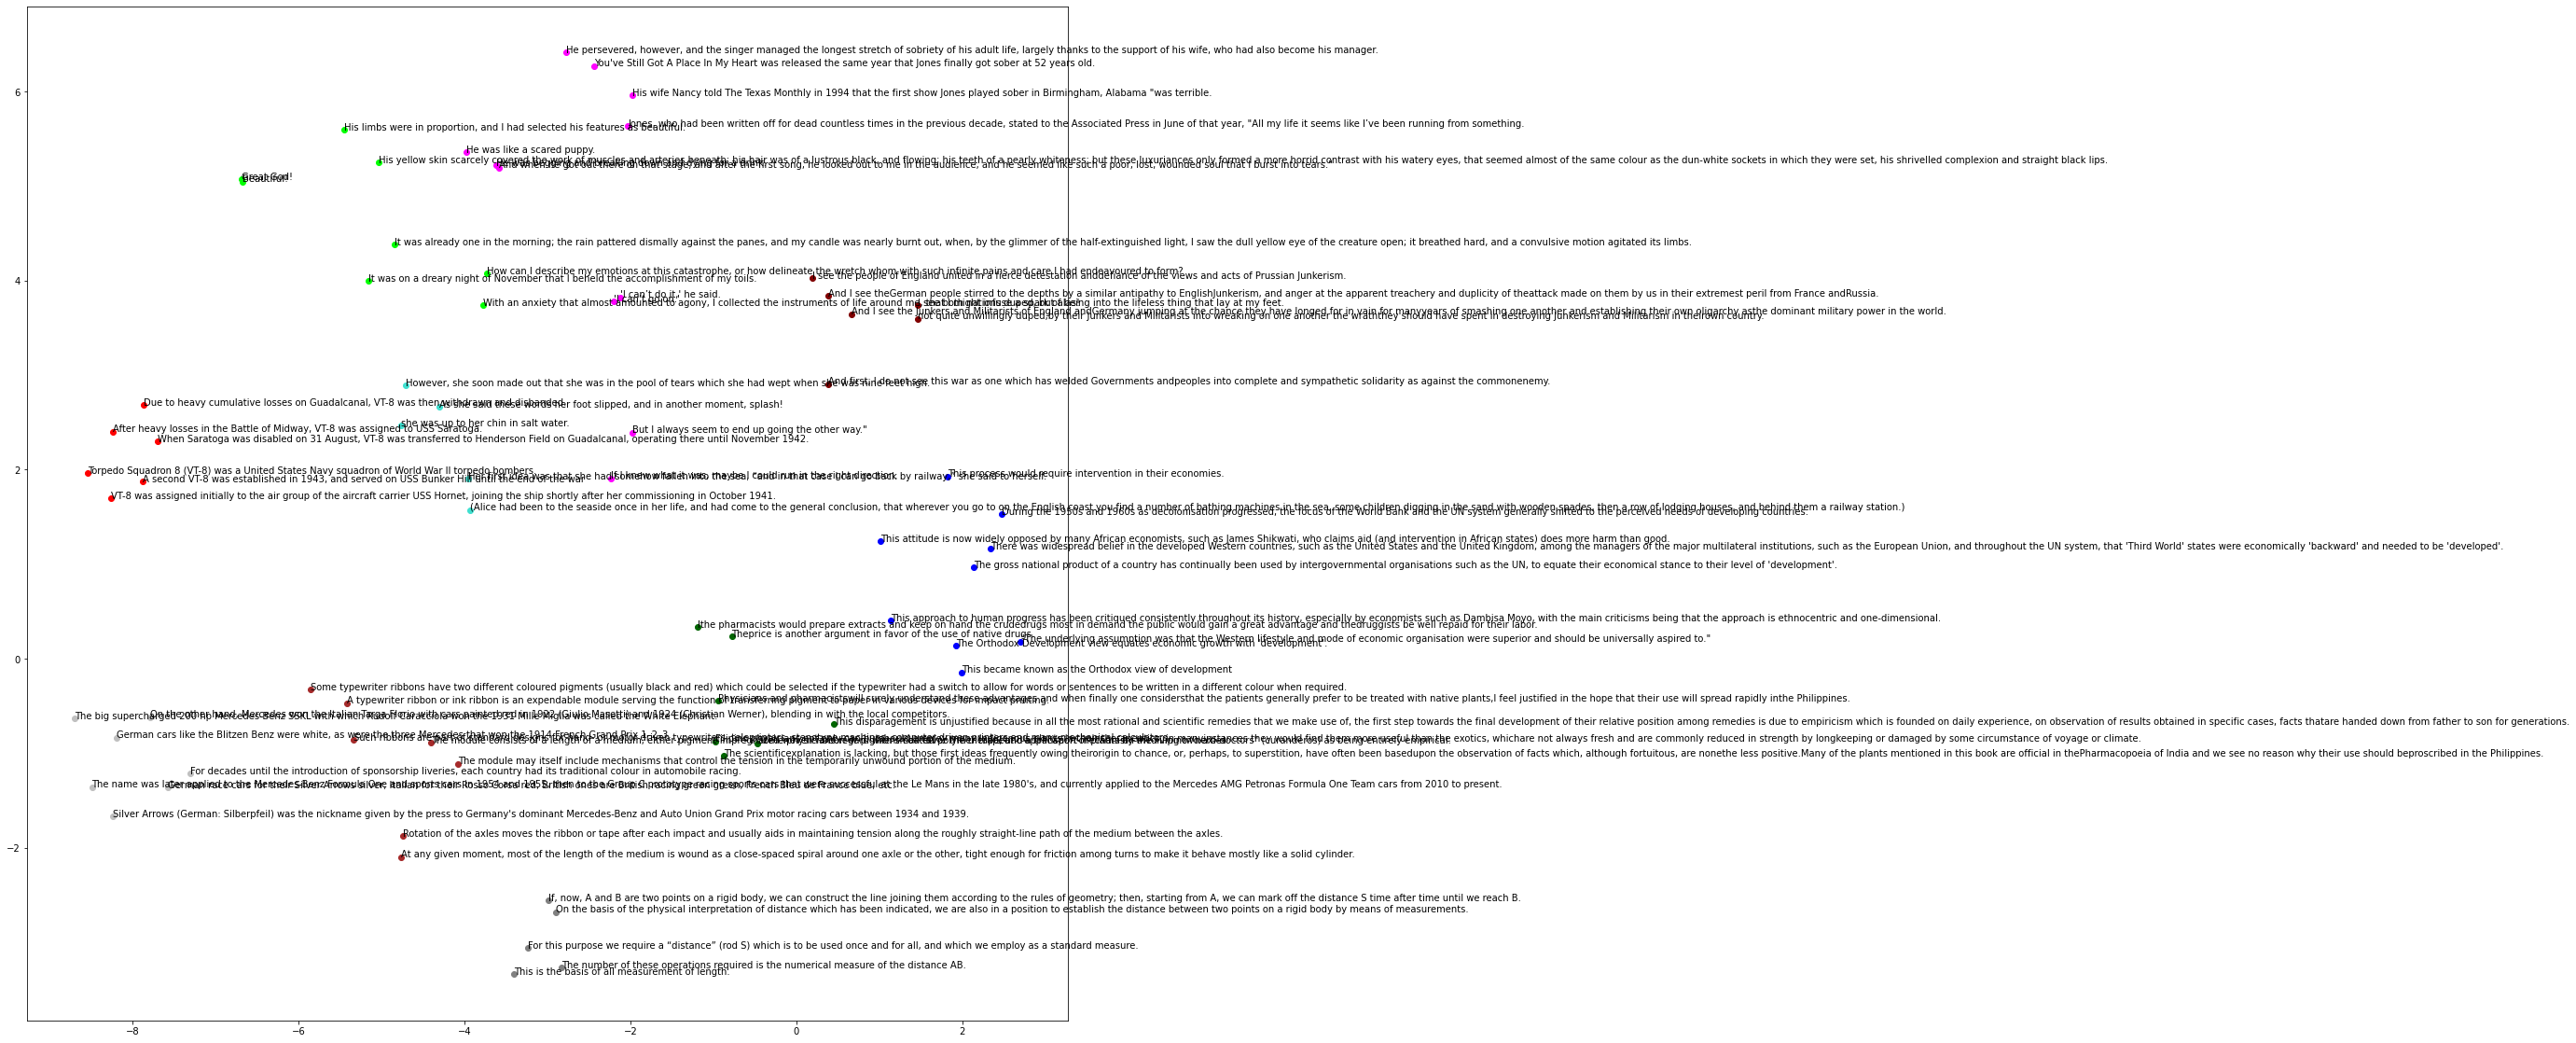

In [53]:
x,y = make_PCA_then_tsne_2d(all_doc_sbert_embeddings)

#plt.scatter(x, y)

colors = ['turquoise', 'lime', 'brown', 'silver', 'blue', 'fuchsia', 'red', 'grey', 'darkgreen', 'maroon']

i = 0
for j, document in enumerate(all_documents):
    color = colors[j]
    for sentence in document:
        plt.scatter(x[i],y[i], color=color)
        i += 1  
    

for i in range(len(all_doc_sbert_embeddings)):
    point = (x[i], y[i])
    plt.annotate(all_sentences[i], point)

plt.show()

Cumulative explained variationfor 50 principal components: 0.9488038420677185
[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.001s...
[t-SNE] Computed neighbors for 71 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 0.527583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.768768
[t-SNE] KL divergence after 1000 iterations: 0.164814


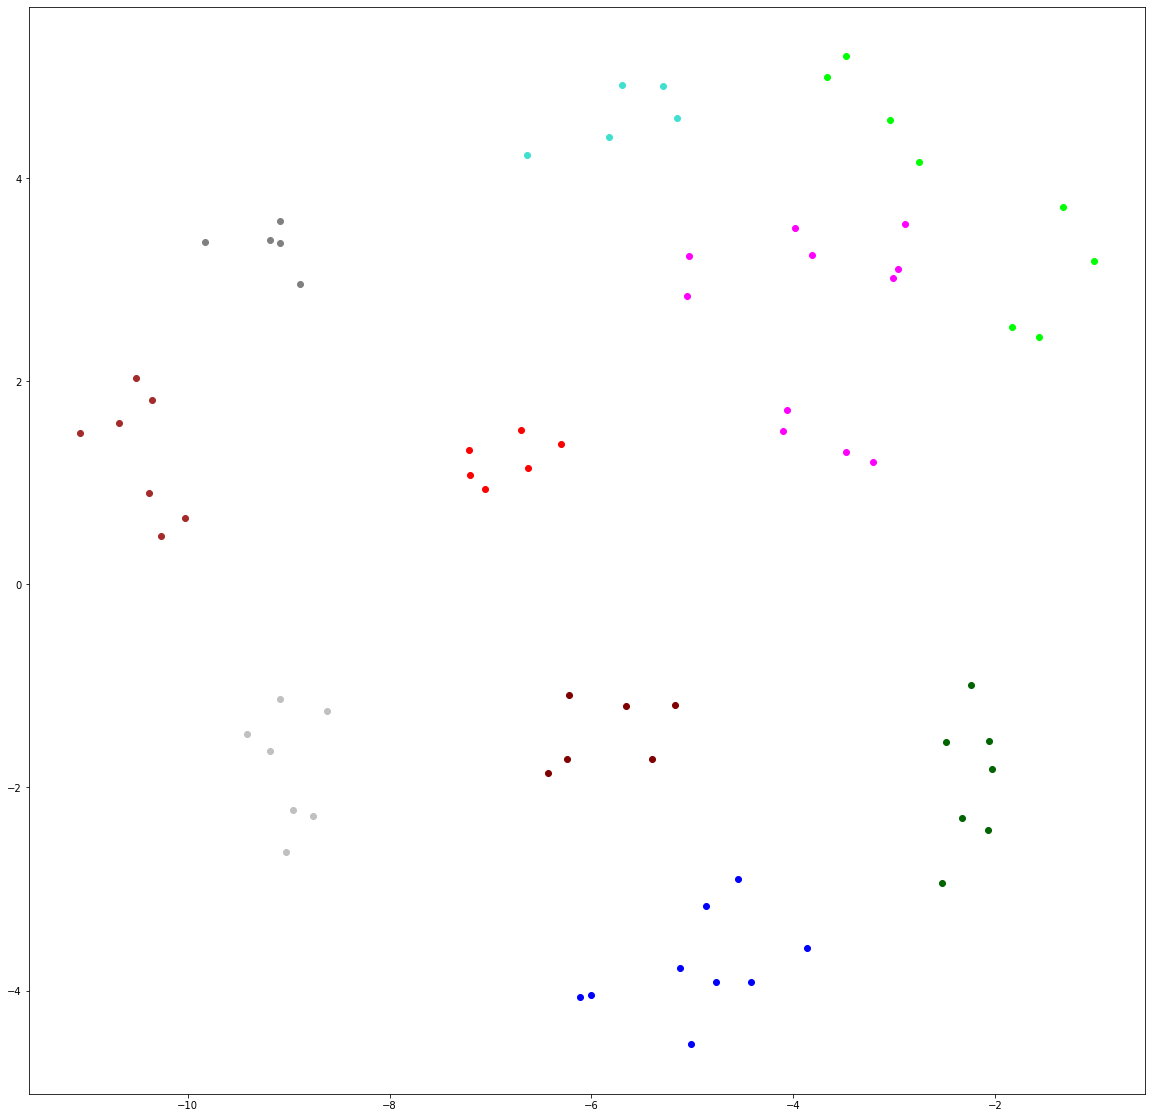

In [49]:
x,y = make_PCA_then_tsne_2d(all_doc_sim_cse_embeddings)

#plt.scatter(x, y)

i = 0
for j, document in enumerate(all_documents):
    color = colors[j]
    for sentence in document:
        plt.scatter(x[i],y[i], color=color)
        i += 1  
    

# for i in range(len(all_doc_embeddings)):
#     point = (x[i], y[i])
#     plt.annotate(all_sentences[i], point)

plt.show()